In [282]:
# import your dependencies

import pandas as pd
import math
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

from sklearn import svm
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')




In [283]:
# import your data using the pandas read csv function. For this project we downloaded AAPL price from Yahoo
#set the index column to the Date

df=pd.read_csv("datasets/AAPL_2.csv", index_col="Date", parse_dates=["Date"])


In [284]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,156.049484,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,140.505798,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,146.503891,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,146.177811,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,148.964386,41025300


In [285]:
# I created 2 new columns: the high-low percent and the percent change
# We'll use this later to make our prediction.

df=df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',]]
df['HL_PCT']= (df['High'] - df['Close'])/df['Close']*100
df['PCT_change']= (df['Close']-df['Open'])/df['Open']*100

In [286]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,156.049484,37039700,0.588911,1.956226
2019-01-03,143.979996,145.720001,142.000000,142.190002,140.505798,91312200,2.482593,-1.243224
2019-01-04,144.529999,148.550003,143.800003,148.259995,146.503891,58607100,0.195608,2.580776
2019-01-07,148.699997,148.830002,145.899994,147.929993,146.177811,54777800,0.608402,-0.517824
2019-01-08,149.559998,151.820007,148.520004,150.750000,148.964386,41025300,0.709789,0.795669


In [287]:
# let's rescope the dataframe to only the columns we will need from here on
df=df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]

In [288]:
df.head()

,Close,HL_PCT,PCT_change,Volume
Date,,,,
2019-01-02,157.919998,0.588911,1.956226,37039700
2019-01-03,142.190002,2.482593,-1.243224,91312200
2019-01-04,148.259995,0.195608,2.580776,58607100
2019-01-07,147.929993,0.608402,-0.517824,54777800
2019-01-08,150.750000,0.709789,0.795669,41025300


In [289]:
#define a variable forecast_col and reassign any non values to -9999
forecast_col = "Close"
df.fillna(-9999, inplace=True)

In [290]:
#use the math function to ensure we are working with intergers and assign the forecast_out to 1% of the length of the dataframe

forecast_out = int(math.ceil(.01*len(df)))

In [291]:
#label is our forecast variable. we shifted it since we don't know what the value is...yet
df['label'] = df[forecast_col].shift(-forecast_out)

In [292]:
#assign our X and y values, do preprocessing to ensure the scale is correct, and from any na values

In [293]:
X = np.array(df.drop(['label'],1))
X=preprocessing.scale(X)
X=X[:-forecast_out]
X_lately=X[-forecast_out: ]


In [294]:
df.dropna(inplace=True)
y=np.array(df['label'])


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [296]:
#our first model will be linear regression
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
accuracy=clf.score(X_test, y_test)
print(accuracy)


0.9076497239860758


In [297]:
#then we will use Support Vector model
clf2 = svm.SVR()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)
accuracy=clf.score(X_test, y_test)
print(accuracy)

0.9076497239860758


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [298]:
#Lastly, we will use a svm with a polynomial kernel
clf3 = svm.SVR(kernel="poly")
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)
accuracy=clf.score(X_test, y_test)
print(accuracy)

0.9076497239860758


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [299]:
forecast_set=clf.predict(X_lately)

In [300]:
print(forecast_set, accuracy, forecast_out)

[206.34167762 205.43906822] 0.9076497239860758 2


In [301]:
df['Forecast'] = np.nan
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day


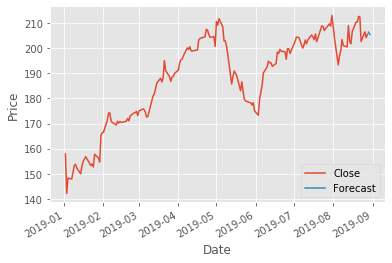

In [302]:
#iterate over the range to identify the prediction
for i in forecast_set:
    next_date= datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
#the forecast of linear regression

In [303]:
#Lets set the forecast for the SVM and display our results

In [304]:
forecast_set_2=clf2.predict(X_lately)

In [305]:
df['Forecast'] = np.nan
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day


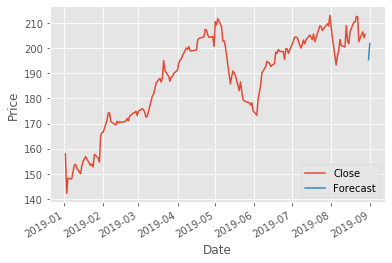

In [306]:
for i in forecast_set_2:
    next_date= datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [307]:
#lastly, we'll use the SVM polynomial kernel and display our results

In [308]:
forecast_set_3=clf3.predict(X_lately)

In [309]:
df['Forecast'] = np.nan
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day


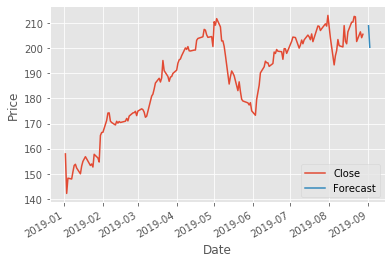

In [310]:
for i in forecast_set_3:
    next_date= datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()